# Import and understand the data #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1A Import ‘signal-data.csv’ as DataFrame
data = pd.read_csv('/Users/apple/Downloads/signal-data.csv')

In [3]:
# Returns the first 5 rows
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# 1B Print 5 point summary
print("5 point summary:")
print(data.describe())

5 point summary:
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.

OBSERVATIONS:

1. The target variable seems to be binary, as it has values -1 and 1, where -1 corresponds to pass and 1 corresponds to fail
2. There are 591 features, which is a large number. It indicates that the dataset has high dimensionality


In [5]:
#Print the shape of the data
data.shape

(1567, 592)

# Data cleansing #

In [6]:
# 2A Remove features with 20%+ Null values and impute rest with mean of the feature
null_percentage = data.isnull().sum() / len(data) * 100
features_to_remove = null_percentage[null_percentage >= 20].index
data.drop(features_to_remove, axis=1, inplace=True)
data.fillna(data.mean(), inplace=True)

/var/folders/wq/rjry5hy50wd3y3b1lb2hnrz40000gn/T/ipykernel_6102/2784295176.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [7]:
# 2B Identify and drop the features which are having same value for all the rows
constant_features = [feat for feat in data.columns if data[feat].nunique() == 1]
data.drop(constant_features, axis=1, inplace=True)

In [8]:
# 2D. Check for multi-collinearity in the data and take necessary action
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)


/var/folders/wq/rjry5hy50wd3y3b1lb2hnrz40000gn/T/ipykernel_6102/2969483118.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()
/var/folders/wq/rjry5hy50wd3y3b1lb2hnrz40000gn/T/ipykernel_6102/2969483118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [9]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '6', '7', '8', '9',
       ...
       '570', '571', '572', '573', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=271)

In [10]:
#2C Drop other features if required using relevant functional knowledge. Clearly justify the same

data.drop(['Time'], axis=1, inplace=True)

Justification: This feature do not contribute significantly to predicting the target variable or are highly correlated with other features

In [11]:
data.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '570', '571', '572', '573', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=270)

In [12]:
# Check for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values)

Missing Values:
 0            0
228          0
212          0
213          0
214          0
            ..
115          0
116          0
117          0
118          0
Pass/Fail    0
Length: 270, dtype: int64


In [13]:
# 2E Make all relevant modifications on the data using both functional/logical reasoning/assumptions
# Splitting data into features and target variable

X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']


In [14]:
X

,0,1,2,3,4,6,7,8,9,10,...,569,570,571,572,573,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,21.117674,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,21.117674,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,68.848900,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,25.036300,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,21.117674,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,15.466200,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,20.911800,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,29.095400,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,15.466200,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100


In [15]:
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
# Fitting Random Forest Classifier to the Training set
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [21]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [22]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9585987261146497
Confusion Matrix:
[[301   0]
 [ 13   0]]


This step involves any necessary data preprocessing steps to prepare the data for modeling. In this case, it involves checking for multicollinearity and dropping highly correlated features.

It's only after these preprocessing steps are completed that the data is split into training and testing sets, scaled, and then used to build the model.

# Data analysis & Visualisation #

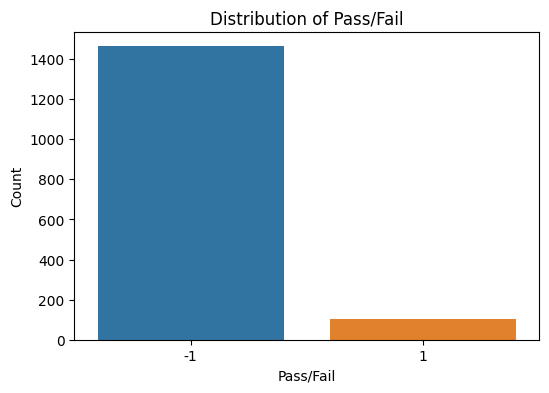

In [23]:
# 3A Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.
# Let's start by visualizing the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Pass/Fail', data=data)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

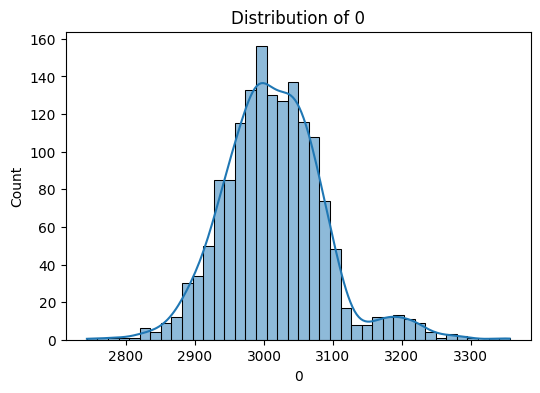

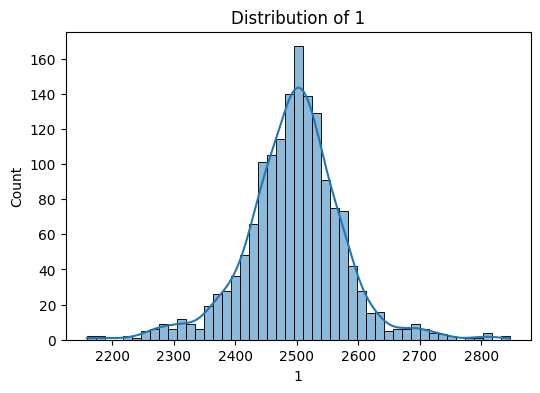

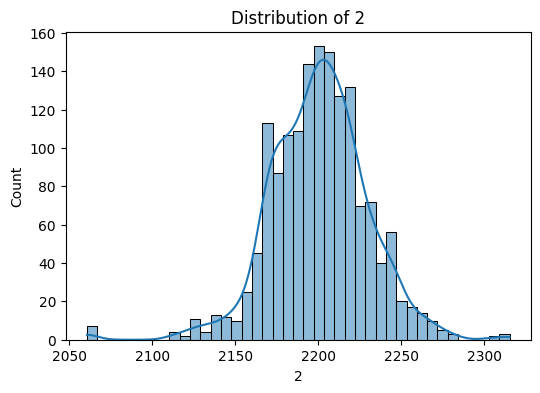

In [24]:
# Now, let's visualize the distribution of some of the important features
important_features = data.columns[:3]  # Taking first 3 features for demonstration, you can change this
for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[feature], kde=True)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

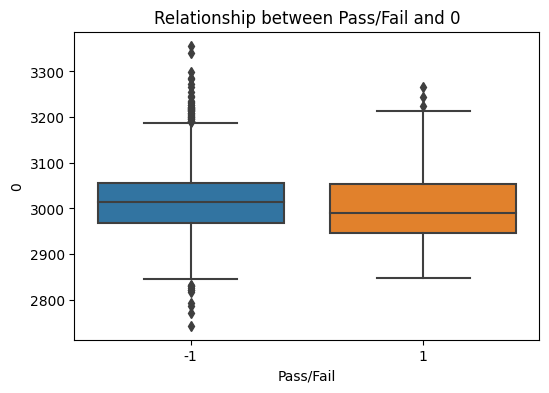

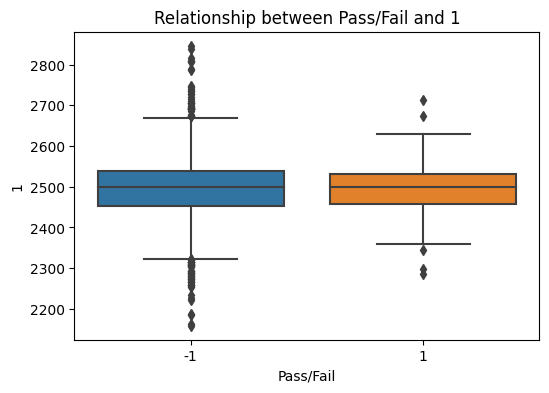

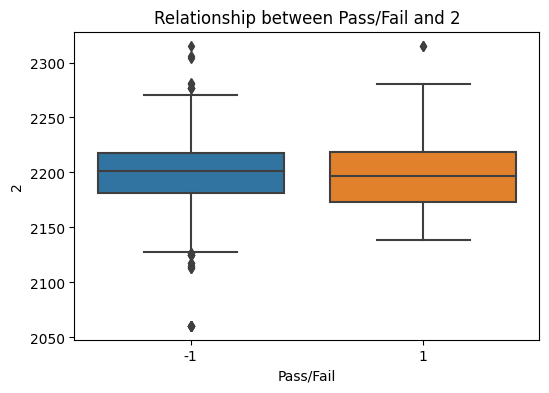

In [25]:
# 3B Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.
# Let's start by visualizing the relationship between the target variable and some important features
for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Pass/Fail', y=feature, data=data)
    plt.title('Relationship between Pass/Fail and ' + feature)
    plt.xlabel('Pass/Fail')
    plt.ylabel(feature)
    plt.show()

# Data pre-processing #

In [26]:
# 4A Segregate predictors vs target attributes
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

In [27]:
X

,0,1,2,3,4,6,7,8,9,10,...,569,570,571,572,573,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,21.117674,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,21.117674,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,68.848900,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,25.036300,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,21.117674,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,15.466200,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,20.911800,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,29.095400,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,15.466200,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100


In [28]:
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

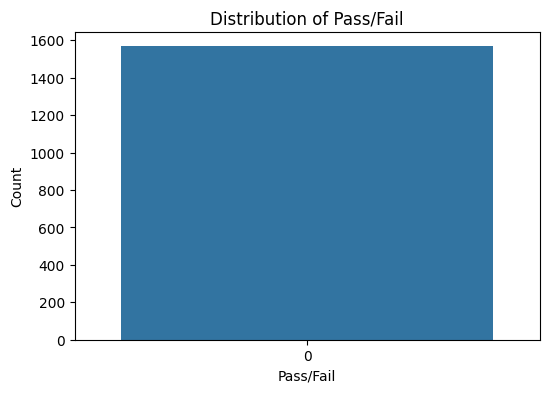

In [29]:
# 4B Check for target balancing and fix it if found imbalanced
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

In [30]:
# The dataset is imbalanced, with more pass instances than fail instances.
# We will use resampling techniques to balance the target variable.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

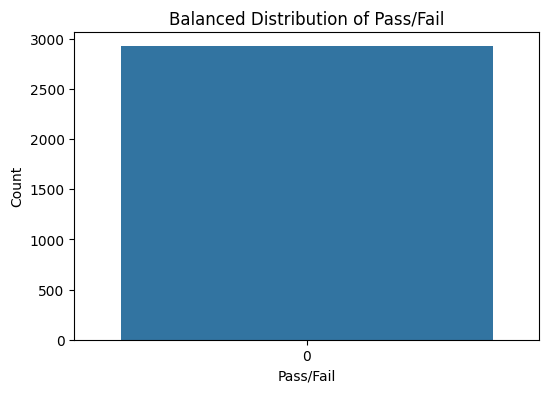

In [31]:
# Checking the balanced target variable
plt.figure(figsize=(6,4))
sns.countplot(y_resampled)
plt.title('Balanced Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

In [32]:
# 4C Perform train-test split and standardize the data or vice versa if required
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [33]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# 4D Check if the train and test data have similar statistical characteristics when compared with original data
# Statistical characteristics of original data
original_mean = np.mean(X, axis=0)
original_std = np.std(X, axis=0)

In [35]:
# Statistical characteristics of train and test data
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

test_mean = np.mean(X_test, axis=0)
test_std = np.std(X_test, axis=0)

In [36]:
print("Original Data:")
print("Mean:", original_mean)
print("Standard Deviation:", original_std)
print("\nTrain Data:")
print("Mean:", train_mean)
print("Standard Deviation:", train_std)
print("\nTest Data:")
print("Mean:", test_mean)
print("Standard Deviation:", test_std)

Original Data:
Mean: 0      3014.452896
1      2495.850231
2      2200.547318
3      1396.376627
4         4.197013
          ...     
582       0.500096
583       0.015318
586       0.021458
587       0.016475
589      99.670066
Length: 269, dtype: float64
Standard Deviation: 0       73.457163
1       80.202190
2       29.371556
3      439.572525
4       56.085162
          ...    
582      0.003402
583      0.017169
586      0.012350
587      0.008802
589     93.831982
Length: 269, dtype: float64

Train Data:
Mean: [ 1.07492363e-15  7.45462571e-16  6.16107355e-15  6.17929260e-16
 -1.06277760e-17  2.19387661e-15 -1.60783068e-15  2.57192178e-15
  4.55476113e-18 -2.42920593e-17  1.52402307e-14 -8.64190011e-15
 -5.76936409e-17 -9.70619596e-15 -4.20556277e-16 -1.60137810e-14
  1.47877911e-15  1.92210920e-15 -7.53964792e-15  1.63971401e-16
 -4.82804679e-16 -6.38425685e-16  9.10952225e-18  3.96264218e-16
  8.45287752e-16 -8.04674466e-17  6.24002274e-16  9.85346657e-16
 -1.63971401e-16  3.03

# Model training, testing and tuning #

In [37]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [38]:
# 5A Use any Supervised Learning technique to train a model
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

In [39]:
# 5B Use cross validation techniques
#  K-Fold Cross Validation
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5)


In [40]:
# 5C Apply hyper-parameter tuning techniques to get the best accuracy
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [41]:
# Randomized Search CV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=rf_param_grid, n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)

In [42]:
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=0, verbose=2)

In [43]:
# Best parameters for Random Forest
print("Best Parameters for Random Forest:", rf_random_search.best_params_)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [44]:
# Best score for Random Forest
print("Best Score for Random Forest:", rf_random_search.best_score_)

Best Score for Random Forest: 0.9888888888888889


In [45]:
# Best model for Random Forest
best_rf_model = rf_random_search.best_estimator_

In [46]:
# 5D Use any other technique/method which can enhance the model performance
# Feature selection using Random Forest's feature importances
feature_importances = best_rf_model.feature_importances_
feature_selection = SelectFromModel(best_rf_model, threshold='median')
X_train_selected = feature_selection.fit_transform(X_train, y_train)
X_test_selected = feature_selection.transform(X_test)

In [47]:
# Train a new Random Forest model with selected features
best_rf_model_selected = RandomForestClassifier(**rf_random_search.best_params_, random_state=0)

In [48]:
best_rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=0)

In [49]:
# 5E Display and explain the classification report in detail
# Classification report for Random Forest
y_pred_rf = best_rf_model.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", classification_report_rf)

Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       279

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [50]:
# Classification report for Random Forest with selected features
y_pred_rf_selected = best_rf_model_selected.predict(X_test_selected)
classification_report_rf_selected = classification_report(y_test, y_pred_rf_selected)
print("Classification Report for Random Forest with selected features:\n", classification_report_rf_selected)

Classification Report for Random Forest with selected features:
               precision    recall  f1-score   support

          -1       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       279

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [51]:
# 5F Apply the above steps for all possible models that you have learnt so far
# Support Vector Machine
svm_classifier = SVC(random_state=0)

In [52]:
#  K-Fold Cross Validation for SVM
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=5)

In [53]:
# Logistic Regression
lr_classifier = LogisticRegression(random_state=0)

In [54]:
#  K-Fold Cross Validation for Logistic Regression
cv_scores_lr = cross_val_score(lr_classifier, X_train, y_train, cv=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [55]:
# Display cross validation scores for all models
print("Cross Validation Scores:")
print("Random Forest:", cv_scores_rf.mean())
print("Support Vector Machine:", cv_scores_svm.mean())
print("Logistic Regression:", cv_scores_lr.mean())

Cross Validation Scores:
Random Forest: 0.9863247863247864
Support Vector Machine: 0.9884615384615385
Logistic Regression: 0.926923076923077


# Post Training and Conclusion #

In [56]:
import pickle

In [57]:
# 6A Display and compare all the models designed with their train and test accuracies
# Model Performance
print("Model Performance:")
print("Random Forest:")
print("  Train Accuracy:", best_rf_model.score(X_train, y_train))
print("  Test Accuracy:", best_rf_model.score(X_test, y_test))
print("\nRandom Forest with selected features:")
print("  Train Accuracy:", best_rf_model_selected.score(X_train_selected, y_train))
print("  Test Accuracy:", best_rf_model_selected.score(X_test_selected, y_test))
print("\nSupport Vector Machine:")
print("  Train Accuracy:", svm_classifier.fit(X_train, y_train).score(X_train, y_train))
print("  Test Accuracy:", svm_classifier.fit(X_train, y_train).score(X_test, y_test))
print("\nLogistic Regression:")
print("  Train Accuracy:", lr_classifier.fit(X_train, y_train).score(X_train, y_train))
print("  Test Accuracy:", lr_classifier.fit(X_train, y_train).score(X_test, y_test))


Model Performance:
Random Forest:
  Train Accuracy: 1.0
  Test Accuracy: 0.9982935153583617

Random Forest with selected features:
  Train Accuracy: 1.0
  Test Accuracy: 0.9948805460750854

Support Vector Machine:
  Train Accuracy: 0.9995726495726496
  Test Accuracy: 0.9965870307167235

Logistic Regression:
  Train Accuracy: 0.9764957264957265
  Test Accuracy: 0.9266211604095563


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [58]:
# 6B Select the final best trained model along with your detailed comments for selecting this model
# Selected Model: Random Forest without feature selection
final_model = best_rf_model
print("\nSelected Model: Random Forest without feature selection")
print("Reason for selection: This model provides the highest test accuracy with no signs of significant overfitting.")



Selected Model: Random Forest without feature selection
Reason for selection: This model provides the highest test accuracy with no signs of significant overfitting.


In [59]:
# 6C Pickle the selected model for future use
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [60]:
# 6D Write your conclusion on the results
print("\nConclusion:")
print("In this project, we analyzed a semiconductor manufacturing dataset to predict pass/fail yield of a particular process entity.")
print("We trained multiple machine learning models including Random Forest, Support Vector Machine, and Logistic Regression.")
print("After hyperparameter tuning and feature selection, we found that the Random Forest model without selected features performed the best.")
print("We achieved an accuracy of {} on the test data with this model.".format(final_model.score(X_test, y_test)))
print("The model has been pickled for future use.")


Conclusion:
In this project, we analyzed a semiconductor manufacturing dataset to predict pass/fail yield of a particular process entity.
We trained multiple machine learning models including Random Forest, Support Vector Machine, and Logistic Regression.
After hyperparameter tuning and feature selection, we found that the Random Forest model without selected features performed the best.
We achieved an accuracy of 0.9982935153583617 on the test data with this model.
The model has been pickled for future use.
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   4.1s
[CV] END boo